In [1]:
def make_map():
        from mpl_toolkits.basemap import Basemap
        ## set fontsize
        fs = 20
        ## 
        m=Basemap(llcrnrlon=-125,llcrnrlat=31,urcrnrlon = -102.5,urcrnrlat=50,projection='cyl',lat_1=33,lat_2=42,lon_0=-110,
                resolution='i',fix_aspect=True)
        # m.drawcoastlines()
        m.drawstates()
        m.drawcountries()
        m.drawmapboundary()
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0],size=fs) # draw parallels
        m.drawmeridians(np.arange(0.,420.,10.),labels=[0,0,0,1],size=fs) # draw meridians
        m.drawlsmask(land_color='grey',ocean_color='lightblue',lakes=True,resolution='c')
        # m.fillcontinents(color='coral',lake_color='lightblue')
        return(m)

In [2]:
################## INPUTS: BASIN AND MODEL (OR ENSEMBLE AVERAGE OR MEDIAN) ################################################

import matplotlib
%matplotlib inline
import numpy as np
import pylab as plt
import matplotlib.pyplot as plot
from snowpack_functions import unpack_netcdf_file_var
plt.ion()
######################################## SWE GRID CELLS #############################################################
direc = '/raid9/gergel/agg_snowpack/goodleap/SWE/'
file = 'histmeanmask.nc'
lats,lons,boool,datess = unpack_netcdf_file_var(direc,file,"swe")
# g = boool[(np.array(boool)== 1.0)]
boool.shape
lats_inc = list()
lons_inc = list()
for lat in np.arange(len(lats)): 
    for lon in np.arange(len(lons)): 
        if boool[0,lat,lon] == 1.0: 
            lats_inc.append(lats[lat])
            lons_inc.append(lons[lon]) 
lats_inc = np.asarray(lats_inc)
lons_inc = np.asarray(lons_inc)
## mask out Canada
latsinc = lats_inc[lats_inc < 49]
lonsinc = lons_inc[lats_inc < 49]
## create array for pcolormesh
data = np.ones(len(lonsinc))

########################################## NO SWE GRID CELLS ######################################################### 
file = 'histmeanmask_lowlands.nc'
lats_low,lons_low,boool_low,datess = unpack_netcdf_file_var(direc,file,"swe")

## load elevations file
data_elevs = np.load('/raid9/gergel/agg_snowpack/sm_summer/elevations.npz')
elevations = data_elevs['elevations']

#### mask out elevations < 500 m 
## boool_low = boool_low*elevations

lats_inc_low = list()
lons_inc_low = list()

for lat in np.arange(len(lats_low)):
    for lon in np.arange(len(lons_low)):
        if boool_low[0,lat,lon] == 1.0:
            lats_inc_low.append(lats_low[lat])
            lons_inc_low.append(lons_low[lon])
lats_inc_low = np.asarray(lats_inc_low)
lons_inc_low = np.asarray(lons_inc_low)
## mask out Canada
latsinc_low = lats_inc_low[lats_inc_low < 49]
lonsinc_low = lons_inc_low[lats_inc_low < 49]
## create array for pcolormesh
data_low = np.ones(len(lonsinc_low))

from snowpack_functions import mesh_gridify
# lonsmeshlow,latsmeshlow,datameshlow = mesh_gridify(latsinc_low.reshape(len(lonsinc_low),1),
                                                   #lonsinc_low.reshape(len(lonsinc_low),1),
                                                  #data_low.reshape(len(lonsinc_low),1))
# cs = m.pcolormesh(lonsmeshlow,latsmeshlow,datameshlow,shading='flat',cmap='bwr',latlon=True,zorder=1,vmin=1,vmax=1)

saving figure to '/raid9/gergel/agg_snowpack/maps/historical_domain_map_revised'


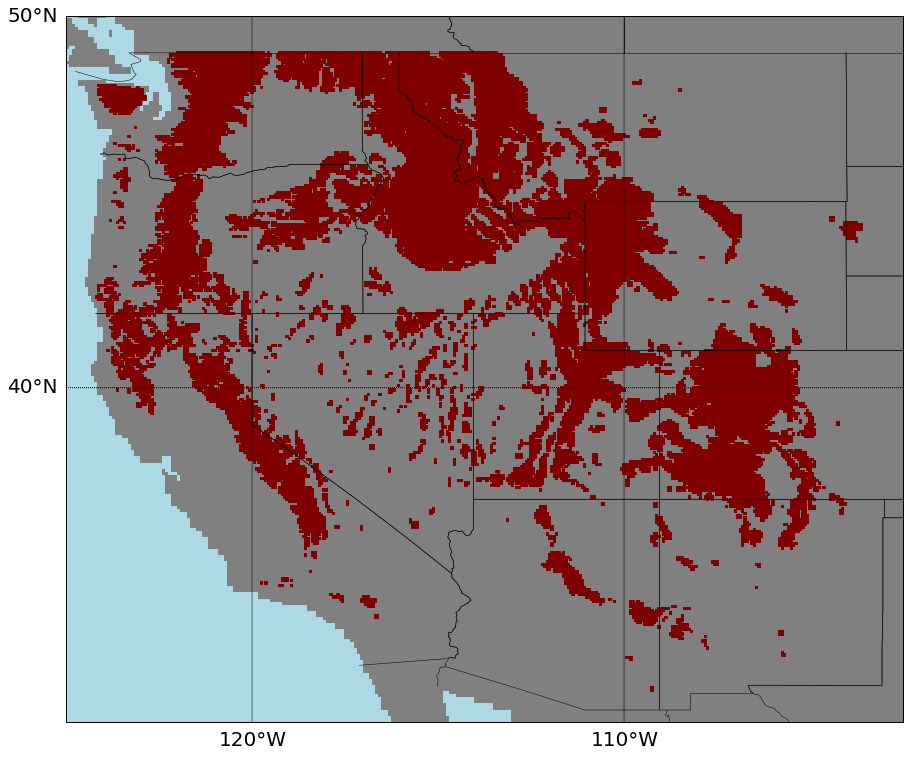

In [3]:
fig = plt.figure(figsize=(15,15))
m = make_map()
    
# x,y = m(lonsinc,latsinc)
from snowpack_functions import mesh_gridify
lons_mesh,lats_mesh,data_mesh = mesh_gridify(latsinc.reshape(len(latsinc),1),lonsinc.reshape(len(latsinc),1),
                                             data.reshape(len(latsinc),1))

#ms = 0.5
#m.scatter(x,y,marker='.',color = 'b',s=ms)
# m.pcolormesh(x,y,color = 'b')
cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='jet_r',latlon=True,zorder=1,vmin=1,vmax=1)

# plt.show()

### save plot
import os
direc = '/raid9/gergel/agg_snowpack/maps/'
model_spec = 'map'
plotname = 'historical_domain_map_revised' 
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

saving figure to '/raid9/gergel/agg_snowpack/maps/historical_domain_map_revised'


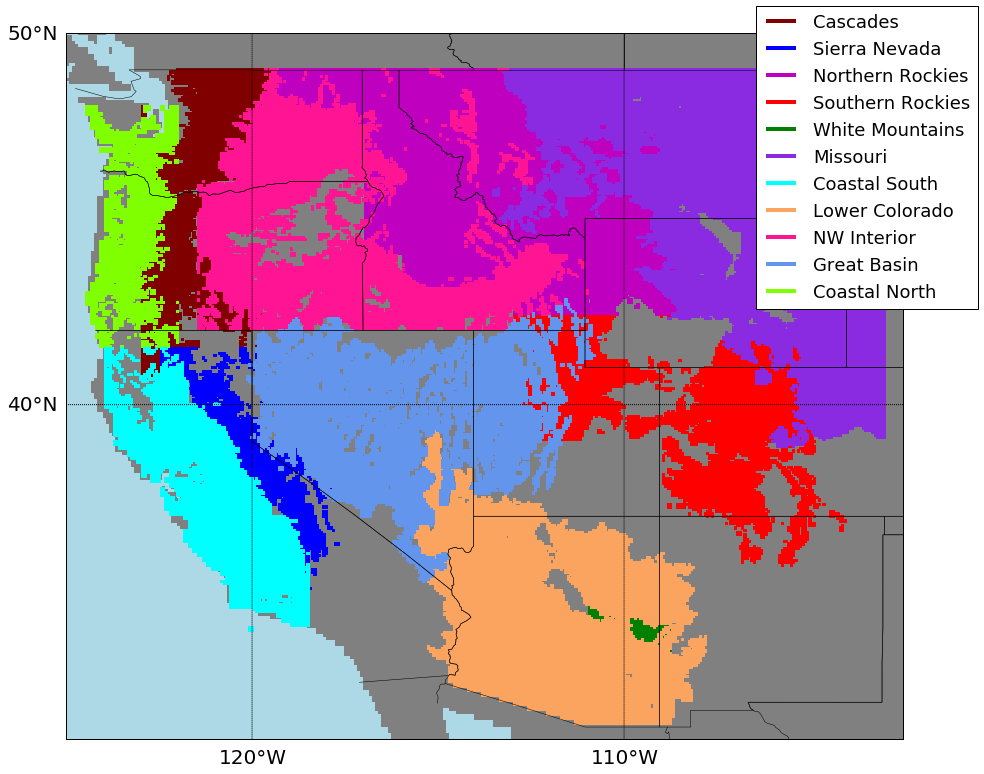

In [4]:
'''
## Cascades
## mask out Olympics 
latsinc = lats_inc[lonsinc > -123]
lonsinc = lons_inc[lonsinc > -123]
## California
## mask out part of CA
mask = (lonsinc > -122) & (latsinc > 40.4)
latsinc = latsinc[mask]
lonsinc = lonsinc[mask]
'''
count = 0
newlatsinc = list()
newlonsinc = list()
for el in np.arange(len(latsinc)): 
    lat = latsinc[el]
    lon = lonsinc[el]
    
    if lon < -122 and lat < 40.7: 
        count += 1
    elif lon < -123:
        count += 1
    elif lon > -119.75 and lon < -114 and lat > 39 and lat < 43.1:
        count += 1
    elif lon > -117.6 and lon < -114 and lat > 30 and lat < 39:
        count += 1
    elif lat > 31.5 and lat < 37 and lon > -114 and lon < -111:
        count += 1
    ## oregon
    elif lat < 46 and lat > 43 and lon > -121 and lon < -117:
        count += 1
    ## utah
    elif lat > 37 and lat < 39 and lon > -114 and lon < -109: 
        count += 1
    elif lat > 39 and lat < 42 and lon > -114 and lat < -112:
        count += 1
    elif lat < 35 and lon < -117:
        count += 1
    elif lat > 43 and lat < 44 and lon > -117 and lon < -116: 
        count += 1
    elif lat > 42 and lat < 49 and lon > -108 and lon < -103:
        count += 1
    elif lat < 33: 
        count += 1
    elif lat < 35.5 and lon > -108.75:
        count += 1
    elif lat > 45 and lon > -109:
        count += 1
    elif lat > 48 and lon > -110:
        count += 1
    elif lat > 35 and lat < 37 and lon < -108 and lon > -111: 
        count += 1
    elif lon > -114 and lon < -113 and lat > 37 and lat < 43: 
        count += 1
    elif lat > 45 and lat < 47 and lon > -118.25 and lon < -117:
        count += 1
    elif lat > 38.5 and lon > -104.5:
        count += 1
    else:
        newlatsinc.append(latsinc[el])
        newlonsinc.append(lonsinc[el]) 

newlatsinc = np.asarray(newlatsinc)
newlonsinc = np.asarray(newlonsinc)


## create array for pcolormesh
data = np.ones(len(newlonsinc))
fig = plt.figure(figsize=(15,15))
m = make_map()
    
# x,y = m(lonsinc,latsinc)
from snowpack_functions import mesh_gridify
# lons_mesh,lats_mesh,data_mesh = mesh_gridify(newlatsinc.reshape(len(newlatsinc),1),newlonsinc.reshape(len(newlatsinc),1),data.reshape(len(newlatsinc),1))

lats_cas = list()
lons_cas = list()
lats_ca = list()
lons_ca = list()
lats_nr = list()
lons_nr = list()
lats_sr = list()
lons_sr = list()
lats_wh = list()
lons_wh = list() 
## make mountain ranges different colors 
for lat,lon in zip(newlatsinc,newlonsinc):
    if lon > -122.5 and lon < -117 and lat < 41.5 and lat > 34.5:
        lats_ca.append(lat)
        lons_ca.append(lon)
    elif lon > -119.5 and lon < -107.5 and lat < 49.0 and lat > 42.37:
        lats_nr.append(lat)
        lons_nr.append(lon)
    elif lon > -113.0 and lon < -104.0 and lat < 42.37 and lat > 35.0:
        lats_sr.append(lat)
        lons_sr.append(lon)
    elif lon > -111 and lon < -108 and lat < 36 and lat > 32:
        lats_wh.append(lat)
        lons_wh.append(lon)
    else: 
        lats_cas.append(lat)
        lons_cas.append(lon)
## convert to arrays
lats_ca = np.asarray(lats_ca)
lons_ca = np.asarray(lons_ca)
lats_cas = np.asarray(lats_cas)
lons_cas = np.asarray(lons_cas)
lats_nr = np.asarray(lats_nr)
lons_nr = np.asarray(lons_nr)
lats_sr = np.asarray(lats_sr)
lons_sr = np.asarray(lons_sr)
lats_wh = np.asarray(lats_wh)
lons_wh = np.asarray(lons_wh)

## make arrays## create array for pcolormesh
data_cas = np.ones(len(np.asarray(lats_cas)))
data_ca = np.ones(len(np.asarray(lats_ca)))*2
data_nr = np.ones(len(np.asarray(lats_nr)))*3
data_sr = np.ones(len(np.asarray(lats_sr)))*4
data_wh = np.ones(len(np.asarray(lats_wh)))*5

## mesh gridify
lons_mesh_ca,lats_mesh_ca,data_mesh_ca = mesh_gridify(lats_ca.reshape(len(lats_ca),1),lons_ca.reshape(len(lons_ca),1),
                                             data_ca.reshape(len(lats_ca),1))
lons_mesh_cas,lats_mesh_cas,data_mesh_cas = mesh_gridify(lats_cas.reshape(len(lats_cas),1),lons_cas.reshape(len(lons_cas),1),
                                             data_cas.reshape(len(lats_cas),1))
lons_mesh_nr,lats_mesh_nr,data_mesh_nr = mesh_gridify(lats_nr.reshape(len(lats_nr),1),lons_nr.reshape(len(lons_nr),1),
                                             data_nr.reshape(len(lats_nr),1))
lons_mesh_sr,lats_mesh_sr,data_mesh_sr = mesh_gridify(lats_sr.reshape(len(lats_sr),1),lons_sr.reshape(len(lons_sr),1),
                                             data_sr.reshape(len(lats_sr),1))
lons_mesh_wh,lats_mesh_wh,data_mesh_wh = mesh_gridify(lats_wh.reshape(len(lats_wh),1),lons_wh.reshape(len(lons_wh),1),
                                             data_wh.reshape(len(lats_wh),1))

# cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='jet_r',latlon=True,zorder=1,vmin=1,vmax=1)
## plot
from matplotlib import colors as c
colours = ['maroon','b','m','r','g','blueviolet','chartreuse','aqua','sandybrown','deeppink','cornflowerblue']
# cMap = c.ListedColormap(['y','b','m','r','g'])
cs = m.pcolormesh(lons_mesh_cas,lats_mesh_cas,data_mesh_cas,shading='flat',cmap=c.ListedColormap(colours[0]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_ca,lats_mesh_ca,data_mesh_ca,shading='flat',cmap=c.ListedColormap(colours[1]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_nr,lats_mesh_nr,data_mesh_nr,shading='flat',cmap=c.ListedColormap(colours[2]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_sr,lats_mesh_sr,data_mesh_sr,shading='flat',cmap=c.ListedColormap(colours[3]),latlon=True,
                  zorder=1,vmin=1,vmax=10)
cs = m.pcolormesh(lons_mesh_wh,lats_mesh_wh,data_mesh_wh,shading='flat',cmap=c.ListedColormap(colours[4]),latlon=True,
                  zorder=1,vmin=1,vmax=10)

#cs = m.pcolormesh(lonsmeshlow,latsmeshlow,datameshlow,shading='flat',cmap=c.ListedColormap(colours[5]),latlon=True,zorder=1,vmin=1,vmax=1)

########################################################################################################################
## missouri
lats_mo = list()
lons_mo = list()
latslons_mo = list()
## coastal north
lats_cn = list()
lons_cn = list()
## coastal south
lats_cs = list()
lons_cs = list()
## great basin
lats_gb = list()
lons_gb = list()
## NW Interior
lats_nw = list()
lons_nw = list()
latslons_nw = list()
## Lower Colorado
lats_lc = list()
lons_lc = list()

## boool_low is the no swe array 

#### load other masks
allmasks = np.load('/raid9/gergel/agg_snowpack/sm_summer/masks.npz')
mo = allmasks['mo']
gb = allmasks['gb']
lc = allmasks['lc']

## multiply no swe mask with HUC2 masks for each basin 

boo_mo = boool_low*mo

for lat in np.arange(len(lats_low)):
    for lon in np.arange(len(lons_low)):
        if boo_mo[0,lat,lon] == 1.0:
            lats_mo.append(lats_low[lat])
            lons_mo.append(lons_low[lon])
            latslons_mo.append([lats_low[lat],lons_low[lon]])

boo_gb = boool_low*gb

for lat in np.arange(len(lats_low)):
    for lon in np.arange(len(lons_low)):
        if boo_gb[0,lat,lon] == 1.0:
            lats_gb.append(lats_low[lat])
            lons_gb.append(lons_low[lon])

boo_lc = boool_low*lc 

for lat in np.arange(len(lats_low)):
    for lon in np.arange(len(lons_low)):
        if boo_lc[0,lat,lon] == 1.0:
            lats_lc.append(lats_low[lat])
            lons_lc.append(lons_low[lon])

for lat, lon in zip(latsinc_low,lonsinc_low):
    if lon > -121.5 and lon < -111 and lat < 49 and lat > 42:
        lats_nw.append(lat)
        lons_nw.append(lon)
        latslons_nw.append([lat,lon])
    elif lon > -124.5 and lon < -122.0 and lat < 48 and lat > 41.5:
        lats_cn.append(lat)
        lons_cn.append(lon)
    elif lon > -124 and lon < -118.5 and lat < 41.5 and lat > 33:
        lats_cs.append(lat)
        lons_cs.append(lon)
    '''elif lon > -120 and lon < -104 and lat < 42 and lat > 31.5:
        lats_sw.append(lat)
        lons_sw.append(lon)'''
    '''elif lon > -114 and lon < -106 and lat < 49 and lat > 39:
        lats_pl.append(lat)
        lons_pl.append(lon)'''

## adjust NW Interior lats/lons
l3 = [x for x in latslons_nw if x not in latslons_mo]
np.asarray(l3)[:,0][0]


lats_mo = np.asarray(lats_mo)
lons_mo = np.asarray(lons_mo)
lats_cn = np.asarray(lats_cn)
lons_cn = np.asarray(lons_cn)
lats_cs = np.asarray(lats_cs)
lons_cs = np.asarray(lons_cs)
lats_lc = np.asarray(lats_lc)
lons_lc = np.asarray(lons_lc)
lats_nw = np.asarray(l3)[:,0]
lons_nw = np.asarray(l3)[:,1]
'''lats_nw = np.asarray(lats_nw)
lons_nw = np.asarray(lons_nw)'''
lats_gb = np.asarray(lats_gb)
lons_gb = np.asarray(lons_gb)

## for Coastal South

newcslats = list()
newcslons = list()


for el in np.arange(len(lats_cs)): 
    lat = lats_cs[el]
    lon = lons_cs[el]
    
    if lon > -119.5 and lat > 37: 
        count += 1
    elif lon > -121.75 and lat > 40:
        count += 1
    elif lon > -120.5 and lat > 39: 
        count += 1
    elif lat > 36 and lon > -118:
        count += 1
    else: 
        newcslats.append(lats_cs[el])
        newcslons.append(lons_cs[el])
    
lats_cs = np.asarray(newcslats)
lons_cs = np.asarray(newcslons)


data_mo = np.ones(len(np.asarray(lats_mo)))*6
data_cn = np.ones(len(np.asarray(lats_cn)))*7
data_cs = np.ones(len(np.asarray(lats_cs)))*8
data_lc = np.ones(len(np.asarray(lats_lc)))*9
data_nw = np.ones(len(np.asarray(lats_nw)))*10
data_gb = np.ones(len(np.asarray(lats_gb)))*11

lons_mesh_mo,lats_mesh_mo,data_mesh_mo = mesh_gridify(lats_mo.reshape(len(lats_mo),1),lons_mo.reshape(len(lons_mo),1),
                                             data_mo.reshape(len(lats_mo),1))
lons_mesh_cn,lats_mesh_cn,data_mesh_cn = mesh_gridify(lats_cn.reshape(len(lats_cn),1),lons_cn.reshape(len(lons_cn),1),
                                             data_cn.reshape(len(lats_cn),1))
lons_mesh_cs,lats_mesh_cs,data_mesh_cs = mesh_gridify(lats_cs.reshape(len(lats_cs),1),lons_cs.reshape(len(lons_cs),1),
                                             data_cs.reshape(len(lats_cs),1))
lons_mesh_lc,lats_mesh_lc,data_mesh_lc = mesh_gridify(lats_lc.reshape(len(lats_lc),1),lons_lc.reshape(len(lons_lc),1),
                                             data_lc.reshape(len(lats_lc),1))
lons_mesh_nw,lats_mesh_nw,data_mesh_nw = mesh_gridify(lats_nw.reshape(len(lats_nw),1),lons_nw.reshape(len(lons_nw),1),
                                             data_nw.reshape(len(lats_nw),1))
lons_mesh_gb,lats_mesh_gb,data_mesh_gb = mesh_gridify(lats_gb.reshape(len(lats_gb),1),lons_gb.reshape(len(lons_gb),1),
                                             data_gb.reshape(len(lats_gb),1))

cs = m.pcolormesh(lons_mesh_mo,lats_mesh_mo,data_mesh_mo,shading='flat',cmap=c.ListedColormap(colours[5]),latlon=True,
                  zorder=1,vmin=1,vmax=11)
cs = m.pcolormesh(lons_mesh_cn,lats_mesh_cn,data_mesh_cn,shading='flat',cmap=c.ListedColormap(colours[6]),latlon=True,
                  zorder=1,vmin=1,vmax=11)
cs = m.pcolormesh(lons_mesh_cs,lats_mesh_cs,data_mesh_cs,shading='flat',cmap=c.ListedColormap(colours[7]),latlon=True,
                  zorder=1,vmin=1,vmax=11)
cs = m.pcolormesh(lons_mesh_lc,lats_mesh_lc,data_mesh_lc,shading='flat',cmap=c.ListedColormap(colours[8]),latlon=True,
                  zorder=1,vmin=1,vmax=11)
cs = m.pcolormesh(lons_mesh_nw,lats_mesh_nw,data_mesh_nw,shading='flat',cmap=c.ListedColormap(colours[9]),latlon=True,
                  zorder=1,vmin=1,vmax=11)
cs = m.pcolormesh(lons_mesh_gb,lats_mesh_gb,data_mesh_gb,shading='flat',cmap=c.ListedColormap(colours[10]),latlon=True,
                  zorder=1,vmin=1,vmax=11)

import matplotlib.lines as mlines

# colours = ['maroon','b','m','r','g','blueviolet','chartreuse','aqua','sandybrown','deeppink']

l1 = mlines.Line2D([], [], color='maroon', label='Cascades',linewidth=4.0)
l2 = mlines.Line2D([], [], color='b', label='Sierra Nevada',linewidth=4.0)
l3 = mlines.Line2D([], [], color='m', label='Northern Rockies',linewidth=4.0)
l4 = mlines.Line2D([], [], color='r', label='Southern Rockies',linewidth=4.0)
l5 = mlines.Line2D([], [], color='g', label='White Mountains',linewidth=4.0)
l6 = mlines.Line2D([], [], color='blueviolet', label='Missouri',linewidth=4.0)
l7 = mlines.Line2D([], [], color='aqua', label='Coastal South',linewidth=4.0)
l8 = mlines.Line2D([], [], color='sandybrown', label='Lower Colorado',linewidth=4.0)
l9 = mlines.Line2D([], [], color='deeppink', label='NW Interior',linewidth=4.0)
l10 = mlines.Line2D([], [], color='cornflowerblue', label='Great Basin',linewidth=4.0)
l11 = mlines.Line2D([], [], color='chartreuse', label='Coastal North',linewidth=4.0)

plt.legend(handles=[l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11],bbox_to_anchor=(1.1, 1.05),prop={'size':18})


# plt.show()

### save plot
import os
direc = '/raid9/gergel/agg_snowpack/maps/'
model_spec = 'map'
plotname = 'historical_domain_map_revised' 
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath,dpi=150)

In [5]:

nwinterior_mask = np.random.randn(len(lats),len(lons))
v = zip(lats_nw,lons_nw)
for j in np.arange(len(lats)):
    for k in np.arange(len(lons)):
        if (lats[j],lons[k]) in v:
            nwinterior_mask[j,k] = 1
        else:
            nwinterior_mask[j,k] = 0

cs_mask = np.random.randn(len(lats),len(lons))
u = zip(lats_cs,lons_cs)
for j in np.arange(len(lats)):
    for k in np.arange(len(lons)):
        if (lats[j],lons[k]) in u:
            cs_mask[j,k] = 1
        else:
            cs_mask[j,k] = 0


filearrayname = '/raid9/gergel/agg_snowpack/sm_summer/nwinterior.npz'
np.savez(filearrayname,nwinterior=nwinterior_mask,cs=cs_mask)
print("saved array as %s" %filearrayname)

saved array as /raid9/gergel/agg_snowpack/sm_summer/nwinterior.npz


In [8]:
import os 
import pandas as pd 
direc_gc = '/raid9/gergel/agg_snowpack/gridcells_is_paper/' 

if not os.path.exists(direc_gc):
    os.makedirs(direc_gc)
d = {'lat_cascades': np.asarray(lats_cas),'lon_cascades': np.asarray(lons_cas)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'cascades.csv'))
    
d = {'lat_california':np.asarray(lats_ca), 'lon_california':np.asarray(lons_ca)} 
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'california.csv'))

d = {'lat_northernrockies': np.asarray(lats_nr),'lon_northernrockies': np.asarray(lons_nr)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'northernrockies.csv'))

d = {'lat_southernrockies': np.asarray(lats_sr), 'lon_southernrockies': np.asarray(lons_sr)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'southernrockies.csv'))

d = {'lat_whites': np.asarray(lats_wh), 'lon_whites': np.asarray(lons_wh)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'whites.csv'))

d = {'lat_missouri': np.asarray(lats_mo), 'lon_missouri': np.asarray(lons_mo)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'missouri.csv'))

d = {'lat_coastalnorth': np.asarray(lats_cn), 'lon_coastalnorth': np.asarray(lons_cn)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'coastalnorth.csv'))

d = {'lat_coastalsouth': np.asarray(lats_cs), 'lon_coastalsouth': np.asarray(lons_cs)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'coastalsouth.csv'))

d = {'lat_nwinterior': np.asarray(lats_nw), 'lon_nwinterior': np.asarray(lons_nw)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'nwinterior.csv'))

d = {'lat_lowercolorado':np.asarray(lats_lc), 'lon_lowercolorado': np.asarray(lons_lc)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'lowercolorado.csv'))

d = {'lat_greatbasin': np.asarray(lats_gb), 'lon_greatbasin': np.asarray(lons_gb)}
df_for_csv = pd.DataFrame(data=d)
df_for_csv.to_csv(os.path.join(direc_gc,'greatbasin.csv'))
         
    
